In [13]:
# This may look like a good bit of code, but most of it is just playing with the 
# plotting parameters to make them look pretty

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import root_scalar

# Import stepping function from parent directory, may need to modify
# if the location is different
import os
import sys
current = os.path.dirname(os.path.abspath('CHEN_3100_HW_7'))
parent = os.path.dirname(current)
sys.path.append(parent + '\CHEN_3100_Toolkit')
from CHEN_3100_Stepping import stepping_MT


# Import equilibrium data from CSV Excel file (must be in the same directory!),
# store as a dataframe
df = pd.read_csv('CHEN 3100 - HW 7 - B-T Binary Data.csv')

# Sanity check the data 
display(df)

# Extract numerical quantities from the dataframe
x_1 = np.array(df['x'])
y_1 = np.array(df['y'])
p1_sat = np.array(df['kPa'])     # Bad header name, fix for next time
p2_sat = np.array(df['kPa.1'])
P = 101.325 # kPa, system pressure


# Fit a 4th order polynomial to the data with the intercept set to 0,
# try not to 'overfit' the data
eq_line = lambda x, a, b, c, d: a*x**4 + b*x**3 + c*x**2 + d*x

# Get parameters and their estimated errors
params, p_cov = curve_fit(eq_line, x_1, y_1)

# Print parameters
print('4th order polynomial fit parameters: ')
print(params)
print('\n')
# Print estimated relative errors in the parameters
print('Relative error in fit parameters: ')
print(np.sqrt(np.diag(p_cov))/np.abs(params))


R2 = 1 - np.sum((y_1-eq_line(x_1,a,b,c,d))**2)/np.sum((y_1-np.mean(y_1))**2)

# Print estimated R^2 value
print('R^2: %0.3f' % R2)

[a,b,c,d] = params


,T (F),T (K),T (C),kPa,kPa.1,x,y
0,176.3,353.3,80.2,101.475,39.026,1.000,1.000
1,182.4,356.7,83.5,112.500,43.808,0.839,0.931
2,188.5,360.1,86.9,124.500,49.050,0.695,0.853
3,194.6,363.5,90.3,137.400,54.783,0.565,0.765
4,200.7,366.9,93.7,151.300,61.041,0.448,0.668
5,206.8,370.2,97.1,166.300,67.856,0.342,0.560
6,212.9,373.6,100.5,182.400,75.262,0.245,0.440
7,219.0,377.0,103.9,199.700,83.297,0.156,0.307
8,225.1,380.4,107.3,218.200,91.995,0.075,0.162
9,231.2,383.8,110.7,238.100,101.394,0.000,0.000


4th order polynomial fit parameters: 
[-0.53527479  1.73777181 -2.52325037  2.32051811]


Relative error in fit parameters: 
[0.07585815 0.04527821 0.01868707 0.0037429 ]
R^2: 1.000


D = 60.000
B = 40.000


C:\Users\pheng\AppData\Local\Temp\ipykernel_38204\880514410.py:40: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


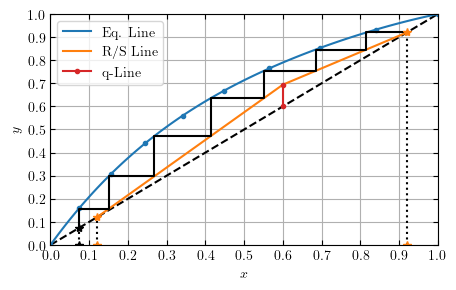

Bottoms Composition: 0.073


In [7]:
# ----- SAT. LIQUID FEED -----
# ----- INPUTS -----
xF = 0.60
xD = 0.92
xB = 0.12
F = 100 # mol/hr
R = 2.4
xq = xF
yq = xq

# Distillate, Bottoms Flow
D = F*(xF-xB)/(xD-xB)
B = F - D
print('D = %0.3f' % D)
print('B = %0.3f' % B)

# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB


# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x = np.linspace(0,1,100)
xx = np.linspace(xB,xD,100)
y = lambda x: eq_line(x,a,b,c,d)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
fig, ax = plt.subplots()

plt.plot(x,x,color='k',linestyle='--')
plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
plt.plot(xx,op_line(xx),color='tab:orange',label='R/S Line')
plt.plot([xq,xq],[xq,mR*xq+bR],color='tab:red',marker='.',label='q-Line')
plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')
plt.plot(x_eq,y_eq,color='k')
plt.plot([x_eq[-1],x_eq[-1]],[0,x_eq[-1]],marker='*',color='k',linestyle=':')
plt.plot([x_eq[0], x_eq[0]],[0,y_eq[0]], linestyle=':',marker='*',color='k',\
         markerfacecolor='tab:orange',markeredgecolor='tab:orange')
plt.plot([xB, xB],[0,xB], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')


# Plot Labels, limits
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tick_params(top='true', right='true', direction='in')
plt.grid()


# Pretty plot parameters
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})

plt.show()

fig.savefig('CHEN_3100_HW_7_1.png',dpi=600,bbox_inches='tight')


print('Bottoms Composition: %0.3f' % x_eq[-1])

y_F = 0.790
R_min = 0.685


C:\Users\pheng\AppData\Local\Temp\ipykernel_38204\3504086891.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


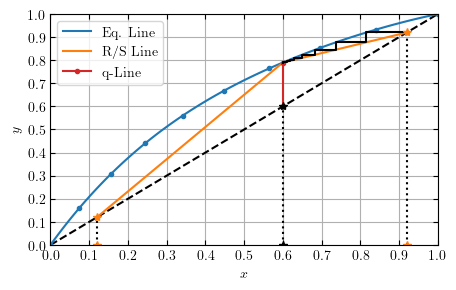

Bottoms Composition: 0.600


In [3]:
# ----- MINIMUM REFLUX ------
# ----- INPUTS -----
xF = 0.60
xD = 0.92
xB = 0.12
F = 100 # mol/hr
xq = xF
yq = xq


# Rectifying slope/intercept
yF = y(xF)
mR = (xD-yF)/(xD-xF)
bR = y(xF) - mR*xF
R_min = mR/(1-mR)


# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB

print('y_F = %0.3f' % yF)
print('R_min = %0.3f' % R_min)
      
      
# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x = np.linspace(0,1,100)
xx = np.linspace(xB,xD,100)
y = lambda x: eq_line(x,a,b,c,d)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
fig, ax = plt.subplots()

plt.plot(x,x,color='k',linestyle='--')
plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
plt.plot(xx,op_line(xx),color='tab:orange',label='R/S Line')
plt.plot([xq,xq],[xq,mR*xq+bR],color='tab:red',marker='.',label='q-Line')
plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')
plt.plot(x_eq,y_eq,color='k')
plt.plot([x_eq[-1],x_eq[-1]],[0,x_eq[-1]],marker='*',color='k',linestyle=':')
plt.plot([x_eq[0], x_eq[0]],[0,y_eq[0]], linestyle=':',marker='*',color='k',\
         markerfacecolor='tab:orange',markeredgecolor='tab:orange')
plt.plot([xB, xB],[0,xB], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')


# Plot Labels, limits
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tick_params(top='true', right='true', direction='in')
plt.grid()


# Pretty plot parameters
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})

plt.show()

fig.savefig('CHEN_3100_HW_7_2.png',dpi=600,bbox_inches='tight')


print('Bottoms Composition: %0.3f' % x_eq[-1])

C:\Users\pheng\AppData\Local\Temp\ipykernel_38204\480305673.py:33: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


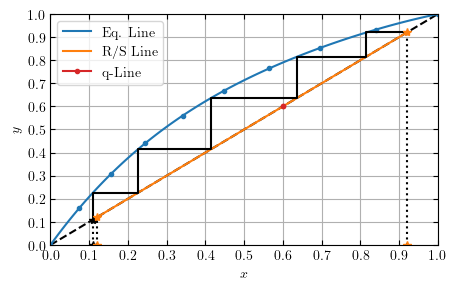

Bottoms Composition: 0.110


In [4]:
# ----- TOTAL REFLUX ------
# ----- INPUTS -----
xF = 0.60
xD = 0.92
xB = 0.12
F = 100 # mol/hr
xq = xF
yq = xq

# Rectifying slope/intercept
mR = 1
bR = 0


# Stripping slope/intercept
mS = 1
bS = 0


# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x = np.linspace(0,1,100)
xx = np.linspace(xB,xD,100)
y = lambda x: eq_line(x,a,b,c,d)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
fig, ax = plt.subplots()

plt.plot(x,x,color='k',linestyle='--')
plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
plt.plot(xx,op_line(xx),color='tab:orange',label='R/S Line')
plt.plot([xq,xq],[xq,mR*xq+bR],color='tab:red',marker='.',label='q-Line')
plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')
plt.plot(x_eq,y_eq,color='k')
plt.plot([x_eq[-1],x_eq[-1]],[0,x_eq[-1]],marker='*',color='k',linestyle=':')
plt.plot([x_eq[0], x_eq[0]],[0,y_eq[0]], linestyle=':',marker='*',color='k',\
         markerfacecolor='tab:orange',markeredgecolor='tab:orange')
plt.plot([xB, xB],[0,xB], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')


# Plot Labels, limits
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tick_params(top='true', right='true', direction='in')
plt.grid()


# Pretty plot parameters
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})

plt.show()

fig.savefig('CHEN_3100_HW_7_3.png',dpi=600,bbox_inches='tight')


print('Bottoms Composition: %0.3f' % x_eq[-1])

C:\Users\pheng\AppData\Local\Temp\ipykernel_38204\76234668.py:35: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


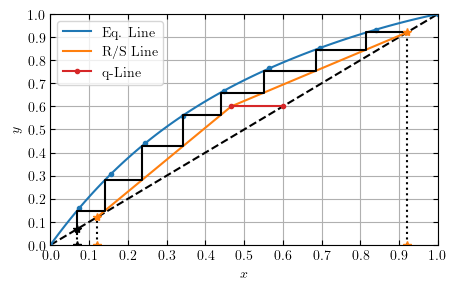

Bottoms Composition: 0.069


In [5]:
# ----- SAT. VAPOR FEED -----
# ----- INPUTS -----
xF = 0.60
xD = 0.92
xB = 0.12
F = 100 # mol/hr
R = 2.4

yq = xF


# Rectifying slope/intercept
bR = xD/(R+1)
mR = (xD-bR)/xD
xq = (yq-bR)/mR

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB


# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x = np.linspace(0,1,100)
xx = np.linspace(xB,xD,100)
y = lambda x: eq_line(x,a,b,c,d)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
fig, ax = plt.subplots()

plt.plot(x,x,color='k',linestyle='--')
plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
plt.plot(xx,op_line(xx),color='tab:orange',label='R/S Line')
plt.plot([xF,xq],[xF,mR*xq+bR],color='tab:red',marker='.',label='q-Line')
plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')
plt.plot(x_eq,y_eq,color='k')
plt.plot([x_eq[-1],x_eq[-1]],[0,x_eq[-1]],marker='*',color='k',linestyle=':')
plt.plot([x_eq[0], x_eq[0]],[0,y_eq[0]], linestyle=':',marker='*',color='k',\
         markerfacecolor='tab:orange',markeredgecolor='tab:orange')
plt.plot([xB, xB],[0,xB], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')


# Plot Labels, limits
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tick_params(top='true', right='true', direction='in')
plt.grid()


# Pretty plot parameters
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})

plt.show()

fig.savefig('CHEN_3100_HW_7_4.png',dpi=600,bbox_inches='tight')


print('Bottoms Composition: %0.3f' % x_eq[-1])

y_F = 0.790
R_min = 1.444


C:\Users\pheng\AppData\Local\Temp\ipykernel_38204\411184760.py:39: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


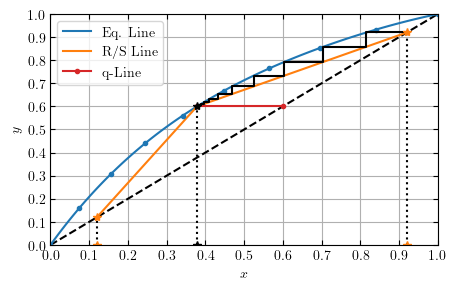

Bottoms Composition: 0.378


In [6]:
# ----- SAT. VAPOR FEED, MIN. REFLUX -----
# ----- INPUTS -----
xF = 0.60
xD = 0.92
xB = 0.12
F = 100 # mol/hr
yq = xF

sol = root_scalar(lambda x: y(x)-xF,method='secant',x0=xF)
xq = sol.root

# Rectifying slope/intercept
mR = (xD-yq)/(xD-xq)
bR = (1-mR)*xD
R_min = mR/(1-mR)

# Stripping slope/intercept
mS = (xB-mR*xq-bR)/(xB-xq)
bS = (1-mS)*xB


print('y_F = %0.3f' % yF)
print('R_min = %0.3f' % R_min)


# A little bit of lambda function magic
op_line = lambda x: np.piecewise(x,[x>=xq,x<xq],[lambda t: mR*t + bR, lambda t: mS*t + bS])



# ----- PLOTTING -----
x = np.linspace(0,1,100)
xx = np.linspace(xB,xD,100)
y = lambda x: eq_line(x,a,b,c,d)

x_eq, y_eq = stepping_MT(xD,xB,y,op_line)

# Plot results
fig, ax = plt.subplots()

plt.plot(x,x,color='k',linestyle='--')
plt.plot(x,y(x),color='tab:blue',label = 'Eq. Line')
plt.plot(xx,op_line(xx),color='tab:orange',label='R/S Line')
plt.plot([xF,xq],[xF,mR*xq+bR],color='tab:red',marker='.',label='q-Line')
plt.plot(x_1,y_1,linestyle='none',marker='.',color='tab:blue')
plt.plot(x_eq,y_eq,color='k')
plt.plot([x_eq[-1],x_eq[-1]],[0,y_eq[-1]],marker='*',color='k',linestyle=':')
plt.plot([x_eq[0], x_eq[0]],[0,y_eq[0]], linestyle=':',marker='*',color='k',\
         markerfacecolor='tab:orange',markeredgecolor='tab:orange')
plt.plot([xB, xB],[0,xB], linestyle=':',marker='*',color='k',markerfacecolor='tab:orange',markeredgecolor='tab:orange')


# Plot Labels, limits
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.tick_params(top='true', right='true', direction='in')
plt.grid()


# Pretty plot parameters
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})

plt.show()

fig.savefig('CHEN_3100_HW_7_5.png',dpi=600,bbox_inches='tight')


print('Bottoms Composition: %0.3f' % x_eq[-1])